#                               Filtri
Dejan Križaj, 2019



**Namen:** Zvezek (Notebook) je namenjen osnovnemu prikazu uporabe kompleksnega računa pri analizi filtrov.

Obravnava filtrov pri predmetu Osnove elektrotehnike 2 je le bežna. Pretežno je njen namen pokazati primernost obravnave vezij z izmeničnimi signali s kompleksnim računom za razumevanje osnovnih konceptov filtriranja signalov. To poglavje torej ne spada med t.i. obvezna znanja pač pa bolj med dopolnilna. Je pa jasno, da v praksi brez filtrov ne gre. 

**Prej bi lahko predelal tudi:**
* O obravnavi vezij vzbujanih z izmeničnimi signali s kompleksnim računom
* O obravnavi resonančnih vezij

<div class="alert alert-block alert-info">
<b>Namig:</b> Obstajata dve verziji tega dokumenta. Ena je v obliki html datoteke (končnica html), ki je ni mogoče izvajati, druga pa ima končnico ipny (Jupyter Notebook), ki jo lahko izvajamo z Jupyter aplikacijo. To aplikacijo imate lahko naloženo na vašem računalniku in se izvaja v brskalniku, lahko jo ogledujete s spletno aplikacijo nbViewer, s spletnimi aplikacijami Binder ali Google Colab  pa jo lahko tudi zaganjate in spreminjate. Več o tem si preberite v 
<a href="http://lbm.fe.uni-lj.si/index.php?option=com_content&view=article&id=59&Itemid=135&lang=si">tem članku</a>.
<br>    
Za izvajanje tega zvezka ne potrebujete posebnega znanja programiranja v Pythonu, lahko pa poljubno spreminjate kodo in se sproti učite tudi uporabe programskega jezika. Več podobnih primerov je na Githubu na https://github.com/osnove/Dodatno/
</div> 
<a href="https://colab.research.google.com/github/osnove/Dodatno/blob/master/Filtri.ipynb">
<img border="0" alt="Filtri" src="https://colab.research.google.com/assets/colab-badge.svg">

## NIZKOPREPUSTNI R-C FILTER

Napetostni harmonični vir priklopimo na zaporedno vezana upor in kondenzator. Zanima nas napetost na izhodu (kondenzatorju) v odvisnosti od napetosti na vhodu pri različnih frekvencah vzbujalnega signala.
 <img src="https://raw.githubusercontent.com/osnove/Slike/master/RC_filter.png" style="height:150px">

Kompleksor izhodne napetosti je (delilnik napetosti):

$${{\underline{U}}_{C}}=\underline{U}\frac{\frac{1}{\text{j}\omega C}}{R+\frac{1}{\text{j}\omega C}}=\underline{U}\frac{1}{1+\text{j}\omega RC} .$$ 
    .	
    
Razmerje med amplitudama napetosti na kondenzatorju in vhodne napetosti lahko označimo kot ojačanje ali tudi prenosna funkcija: 

$$A=\left| \frac{{{\underline{U}}_{C}}}{\underline{U}} \right|=\frac{1}{\sqrt{1+{{\left( \omega RC \right)}^{2}}}} ,$$ 

fazni kot med napetostnima signaloma pa je $\varphi =\text{Atan}(-\omega RC)$.



Izrišimo ojačanje (prenosno funkcijo) za konkretne vrednosti, recimo $R=1\ \text{k }\!\!\Omega\!\!\text{ },\ C=10\ \text{ }\!\!\mu\!\!\text{ F}$

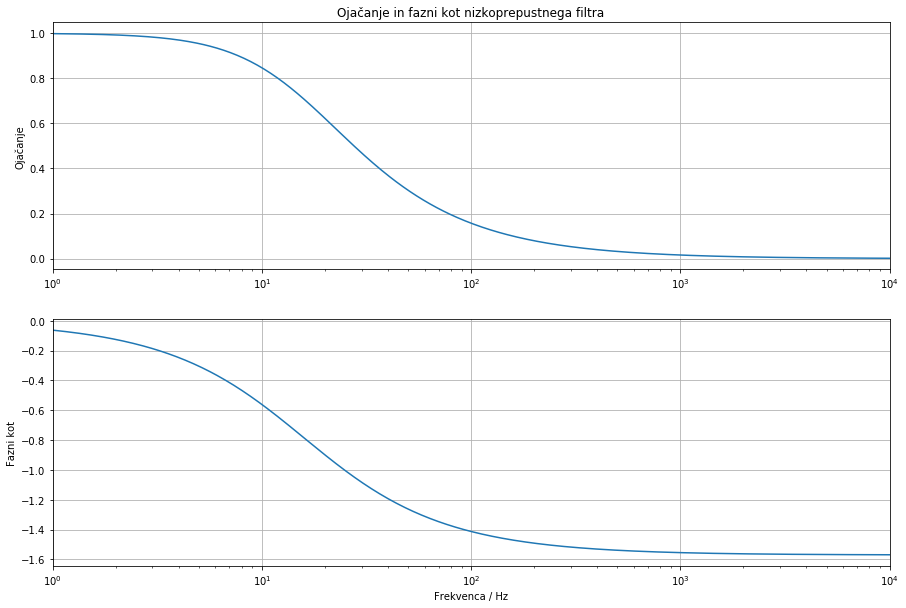

In [0]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 

R=1e3
C=10e-6
eksponent=np.linspace(0,4,500) # izdelamo 500 točk od 1 do 4, linearno
freq=10**(eksponent) # tvorimo niz frekvenc od 1e1 do 1e4
omega=2*np.pi*freq


H=1/(1+1j*omega*R*C)

plt.figure(figsize=(15, 10))
plt.subplot(211)
plt.semilogx(freq, abs(H))
plt.ylabel('Ojačanje')
plt.title('Ojačanje in fazni kot nizkoprepustnega filtra')
plt.xlim(min(freq),max(freq))
plt.grid()

plt.subplot(212)
plt.semilogx(freq,np.angle(H))
plt.ylabel('Fazni kot')
plt.xlabel('Frekvenca / Hz')
plt.xlim(min(freq),max(freq))
plt.grid()
plt.show()

Ojačanje in fazni kot na sliki opisuje zmanjšanje napetosti na kondenzatorju pri višjih frekvencah. To je tudi sicer pričakovano, saj se upornost kondenzatorja pri izmeničnih signalih s frekvenco manjša $\left( \frac{1}{\omega C} \right)$, torej se manjša tudi padec napetosti na njej. Hkrati se spreminja fazni kot izhodnega signala, ki je v konkretnem primeru enak razliki med faznim kotom napetosti na kondenzatorju in faznim kotom vhodnega napetostnega signala. Ta je pri nizkih frekvencah enak nič, saj je tedaj na kondenzatorju praktično vsa vhodna napetost. Pri visokih frekvencah pa bo praktično vsa napetost na uporu, le majhen del pa na kondenzatorju.
Ker je napetost na kondenzatorju pri višjih frekvencah zelo nizka, tako vezje obravnavamo kot primer preprostega nizkofrekvenčnega (prepustnega) RC filtra (sita), ki »ohrani« nizkofrekvenčne signale, visokofrekvenčne pa zmanjša oz. »izloči«. 

Običajno določimo frekvenco, pri kateri se začne napetost bistveno zmanjševati pri vrednosti ${{U}_{C}}=U/\sqrt{2}=0,707\cdot U$. To imenujemo tudi mejna frekvenca ${{f}_{0}}$.

Za konkretno obravnavani primer RC filtra dobimo mejno frekvenco tako, da upoštevamo $\frac{{U}_{C}}{U}=\frac{1}{\sqrt{2}}$:

$\frac{1}{\sqrt{2}}=\frac{1}{\sqrt{1+{{\left( {{\omega }_{0}}RC \right)}^{2}}}}\ \Rightarrow \ 2=1+{{\left( 2\text{ }\!\!\pi\!\!\text{ }{{f}_{0}}RC \right)}^{2}}\ \Rightarrow \ {{f}_{0}}=\frac{1}{2\text{ }\!\!\pi\!\!\text{ }RC}$

Izračunajmo mejno frekvenco analitično in numerično. (Nekoliko razlike v izračunu seveda lahko pričakujemo, saj je prenosna funkcija izračunana le v diskretnih točkah). 

In [0]:
# Analitičen izračun mejne frekvence
freq_0=1/(2*np.pi*R*C)
print('Mejna frekvenca je %4.2f' % freq_0,' Hz')

# Numeričen izračun mejne frekvence
# poiščemo indeks (mesto v nizu), kjer postane abs(H)<0.707
indeks=np.where(abs(H)<1/np.sqrt(2))
# indeks vsebuje niz z mesti, kjer je izpolnjen pogoj
print(indeks[0][0]) # izpis prvega indeksa

print('Mejna frekvenca izračunana numerično je %4.2f' % freq[indeks[0][0]],' Hz')

Mejna frekvenca je 15.92  Hz
150
Mejna frekvenca izračunana numerično je 15.94  Hz


**Zdaj pa ti:** Napiši kodo, ki bo na zgornji sliki dorisala črto (horizontalno in vertikalno) mejne frekvence. (Rešitev je na koncu zvezka)

Glede na izračun, je za konkretne vrednosti R in C mejna frekvenca okoli 15 Hz. Naredimo preiskus, kako bi tak filter prepuščal signal, sestavljen iz treh frekvenc od katerih je ena manjša od 15 Hz (npr. 10Hz), drugi dve pa večji (npr. 50 Hz in 200 Hz). Slednja signala hočemo izločiti iz osnovnega. Najprej kreirajmo vhodni signal in ga prikažimo na sliki.

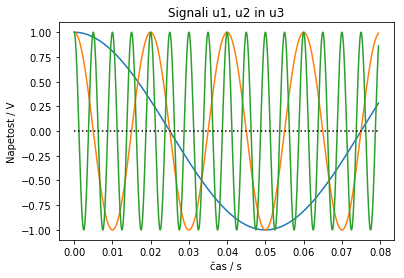

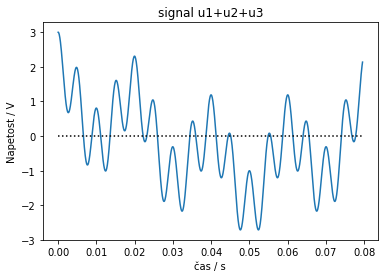

In [0]:
## Izdelava in prikaz testnega signala
# Nastavitev parametrov
omega1=2*np.pi*10
omega2=2*np.pi*50
omega3=2*np.pi*200
U1=1 # amplituda signala u1(t)
U2=1
U3=1

# časovni niz
t=np.linspace(0,5/omega1,2000) 

# napetostni signali
u1=U1*np.cos(omega1*t)
u2=U2*np.cos(omega2*t)
u3=U3*np.cos(omega3*t)
u=u1+u2+u3

plt.figure()
plt.title('Signali u1, u2 in u3')
plt.xlabel('čas / s')
plt.ylabel('Napetost / V')
plt.plot(t,u1,t,u2,t,u3)
#plt.plot(t,u,label='u(t)')
plt.plot([0, max(t)],[0, 0], linestyle=':',color='k') # dodamo ničlo

plt.figure()
plt.title('signal u1+u2+u3')
plt.xlabel('čas / s')
plt.ylabel('Napetost / V')
plt.plot(t,u,label='u(t)')
plt.plot([0, max(t)],[0, 0], linestyle=':',color='k') # dodamo ničlo
plt.show()

**Ugotovitve:** Čeprav ima vsak posamezen signal amplitudo 1 V, vidimo, da že pri vsoti treh signalov različnih frekvenc težko prepoznamo vsak posamezen signal.

Da bi upoštevali vpiv filtra, moramo vsak posamezen signal pretvoriti v kompleksor in ugotoviti (izračunati) izhodni kompleksor, tega pretvoriti v časovni signal in nato vse tri signale sešteti v časovnem prostoru. Če bi seštevali kompleksorje bi naredili napako, saj nastopajo pri različnih frekvencah!

0.8467330159648304 0.30331447105335285 0.07932669684365852


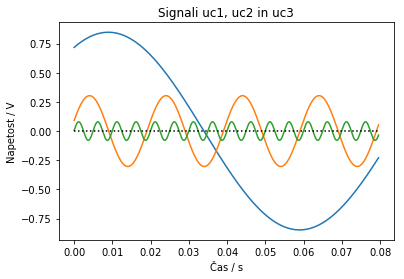

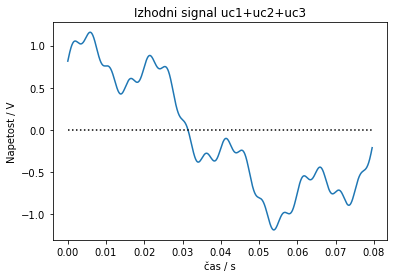

In [0]:
# Izračun kompleksorjev napetosti na kodenzatorju za vsako frekvenco posebej
# ker smo imeli signal u=1*cos(omega*t) je kompleksor ya vse enak kar 1 
def H(omega): # funkcija, ki vrne prenosno funkcijo
    return 1/(1+1j*omega*R*C)

UC1=U1*H(omega1); # kompleksor UC1
uc1=abs(UC1)*np.cos(omega1*t+np.angle(UC1))
UC2=U2*H(omega2); 
uc2=abs(UC2)*np.cos(omega2*t+np.angle(UC2))
UC3=U3*H(omega3)
uc3=abs(UC3)*np.cos(omega3*t+np.angle(UC3))
print(abs(UC1),abs(UC2),abs(UC3))

plt.figure()
plt.title('Signali uc1, uc2 in uc3')
plt.xlabel('Čas / s')
plt.ylabel('Napetost / V')
plt.plot(t,uc1,t,uc2,t,uc3)
plt.plot([0, max(t)],[0, 0], linestyle=':',color='k') # dodamo ničlo

plt.figure()
plt.title('Izhodni signal uc1+uc2+uc3')
plt.xlabel('čas / s')
plt.ylabel('Napetost / V')
plt.plot(t,uc1+uc2+uc3)
plt.plot([0, max(t)],[0, 0], linestyle=':',color='k') # dodamo ničlo
plt.show()

**Ugotovitve:** Na prvi sliki vidimo, koliko je zadušen vsak posamezen signal. Višja kot je frekvenca, bolj je signal zmanjšan. Še vedno pa iz vhodnega signala ne izluščimo dovolj dobro signala 10 Hz. Ta je tudi zmanjšan glede na osnovnega, saj leži preblizu mejne frekvence.

**Zdaj pa ti:** 
* Spremeni frekvence posameznih signalov npr. na 5, 100, 500 in ugotavljaj, kako v tem primeru deluje filter.
* Dodaj končni sliki še originalen nizkofrekvenčni signal.
* Končni signal vsebuje še vedno precej[nji delež višje frekvenčnih signalov, saj smo izhajali iz treh signalov z enakimi amplitudami. Zmanjšaj amplitudi višje frekvenčnih signalov na 0.1 in še enkrat poglej rezultat. Rezultat je seveda "boljši", izhodni signal je bolj "podoben" nizkofrekvenčnemu. Je pa bil namen te spremembe tudi dodatna ugotovitev, da je izhodni signal fazno premaknjen glede na vhodnega. Kar je v določenih aplikacijah tudi potrebno upoštevati.

Ugotovili smo, da nizkoprepustni RC filter bolj ali manj uspešno prepušča signale s frekvenco nižjo od mejne frekvence, višjefrekvenčne signale pa zmanjša. Učinkovitost filtra je odvisna od tega, kako blizu mejne frekvence so višjefrekvenčni signali in kako velike amplitude imajo. V določenih primerih nam ta filter ne zadošča oziroma ne zaduši dovolj visokofrekvenčnih signalov. V teh primerih je potrebno iskati boljše rešitve - filtre višjega reda. Nekaj malega o tem v nadaljevanju.

Pred tem si poglejmo še nekoliko drugačno grafično predstavitev filtrov - s t.i. Bodejevim diagramom (plotom). 


## Bodejev diagram

Pogosto za prikaz »ojačanja« filtra uporabimo logaritemsko merilo in sicer kot 

$${{A}_{\text{dB}}}=20\log (A) .$$ 

Pri ojačanju ena je logaritem enak nič, pri mejni frekvenci pa je ojačanje enako $20\log (1/\sqrt{2})\cong -3\ \text{dB}$. Razmerje v decibelih (dB) prikazuje spodnji graf, ki ga imenujemo tudi Bodejev diagram (ang. Bode plot). 

V spodnji celici pripravimo izris Bodejevega diagrama za nizkoprepustni RC filter.



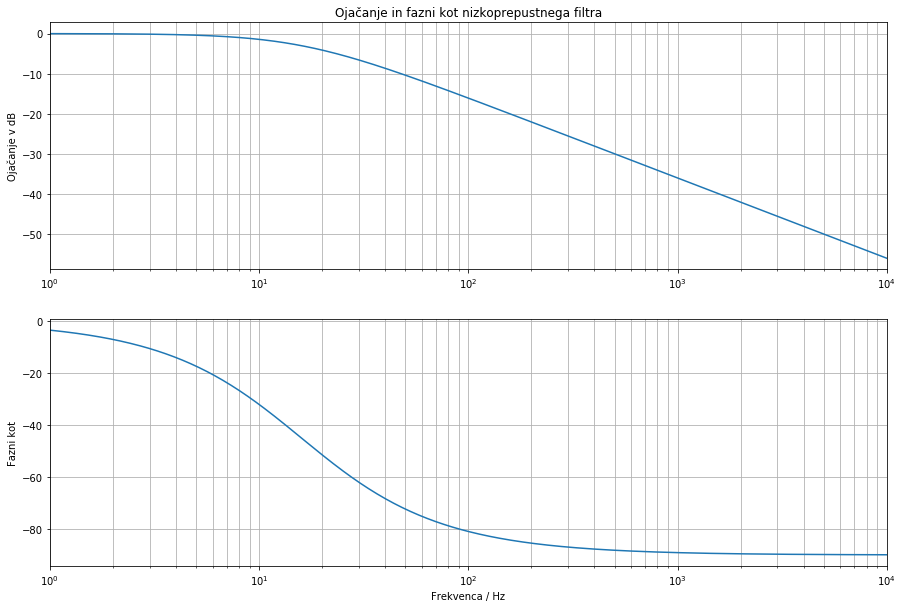

In [0]:
R=1e3
C=10e-6
eksponent=np.linspace(0,4,500) # izdelamo 500 točk od 1 do 4, linearno
freq=10**(eksponent) # tvorimo niz frekvenc od 1e1 do 1e4
omega=2*np.pi*freq

H=1/(1+1j*omega*R*C)

A_dB=20*np.log10(np.abs(H))

plt.figure(figsize=(15, 10))
plt.subplot(211)
plt.semilogx(freq, A_dB)
plt.ylabel('Ojačanje v dB')
plt.title('Ojačanje in fazni kot nizkoprepustnega filtra')
plt.xlim(min(freq),max(freq))
plt.grid(True,which="both",ls="-")

plt.subplot(212)
plt.semilogx(freq,np.angle(H)*180/np.pi)
plt.ylabel('Fazni kot')
plt.xlabel('Frekvenca / Hz')
plt.xlim(min(freq),max(freq))
plt.grid(True,which="both",ls="-")
plt.show()

Iz Bodejevega diagrama vidimo, da se po mejni frekvenci ojačanje (slablenje) v logaritemskem merilu linearno zmanjšuje s frekvenco. Za frekvence, ki so mnogo večje od mejne, lahko enačbo prenosne funkcije nizkoprepustnega RC filtra aproksimiramo z 

$A=\left| \frac{{{\underline{U}}_{C}}}{\underline{U}} \right|=\frac{1}{\sqrt{1+{{\left( \omega RC \right)}^{2}}}}\approx \frac{1}{\omega RC}$. 

Če to izrazimo z ojačanjem v decibelih dobimo ${{A}_{\text{dB}}}=20\log (\frac{1}{\omega RC})=-20\log (\omega RC)=-20\log (\omega )-20\log (RC)$. Iz enačbe ugotovimo, da se ojačanje zmanjšuje za 20 decibelov pri vsakem povečanju frekvence za 10x. Rečemo, da je slablenje filtra -20 dB/dekado. Takemu filtru rečemo tudi filter prvega reda. V praksi pogosto uporabimo tudi filtre višjega reda, ki omogočajo bolj učinkovito dušenje. Filter drugega reda ima slablenje -40 dB/dekado itd.
 

**Zdaj pa ti:**
* Napiši kratko kodo, ki izpiše tabelico vrednosti A in A v dB za vrednosti 1,0.5,0.1,0.01,0.001 (Rešitev je na koncu zvezka)
* Doriši Bodejevem diagramu dve krivulji - premici. Prva gre od min(freq) do mejne frekvence, druga premica pa od mejne frekvence ob krivulji navzdol z 20 dB/dekado. (Rešitev je na koncu zvezka) 


## Kaj pa odvisnost od bremena?

Pri filtrih pogosto govorimo samo o "signalih", kjer nas zanima le razmerje med izhodno in vhodno veličino, običajno napetostjo. To je načeloma OK, če je breme, ki ga na izhodu priključimo visokoohmsko (ima veliko upornost), npr. IC ojačevalnik z zelo veliko vhodno upornostjo. Kaj pa če ima breme impedanco primerljivo z impedanco filtra?

Poglejmo si vpliv velikosti bremena na odziv vezja oz. učinkovitost nizkoprepustnega RC filtra.

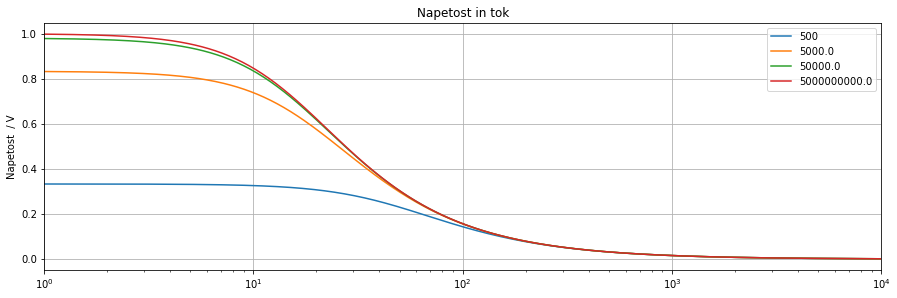

In [0]:
## Bodejev diagram nizkoprepustnega filtra za različna bremena
R=1e3
C=10e-6
U=1
eksponent=np.linspace(0,4,500) # izdelamo 500 točk od 1 do 4, linearno
freq=10**(eksponent) # tvorimo niz frekvenc od 1e1 do 1e4
omega=2*np.pi*freq

Rb=[500,5e3,5e4,5e9]
def Uc(Rb1):
    Z=R+1/(1j*omega*C+1/Rb1)
    I=U/Z
    return I/(1j*omega*C+1/Rb1)

plt.figure(figsize=(15, 10))
plt.subplot(211)
for i in range(len(Rb)):
    plt.semilogx(freq, abs(Uc(Rb[i])))
plt.ylabel('Napetost  / V')
plt.title('Napetost in tok')
plt.xlim(min(freq),max(freq))
plt.legend(Rb)
plt.grid()
plt.show()

**Ugotovitve:** Vidimo, da lahko upornost bremena precej vpliva na končno napetost na bremenu. Sedaj namreč upor v RC filtru deluje z uporom bremena kot napetostni delilnik, zato se za majhne upornosti bremena v primerjavi z upornostjo R v RC filtru napetost na bremenu precej zmanjša. Ena od rešitev je, da se ohrani enak produkt RC filtra, saj ta določa mejno frekvenco, pri tem, da se zmanjša upornost R tega filtra in poveča kapacitivnost C. 

**Zdaj pa ti:** Poskusi sam! Zmanjšaj R in povečaj C in preveri izrisan graf.

### Zdaj pa ti

Kaj pa visokoprepustni filter? Zelo enostavno. Samo zamenjaš kondenzator in upor in torej gledaš napetost na uporu. V tem primeru kondenzator ne prepušča nizkofrekvenčnih signalov, visokofrekvenčne pač. Preiskusi sam. Lahko skopiraš celico za nizkoprepustni filter in spremeniš prenosno funkcijo ali pa to narediš kar v isti celici. (Za vsak slučaj je rešitev na koncu zvezka)

## Kaj pa tuljava?

Reaktanca tuljave se veča s frekvenco, torej lahko deluje kot filter za nizkofrekvenčne signale, če jo zaporedno vežemo v vezje.  Lahko pa jo kombiniramo z RC filtrom in dobimo filter drugega reda.

Vzemimo, da dodamo nizkoprepustnemu RC filtru tuljavo, ki jo vežemo zaporedno z uporom. Poglejmo si Bodejev diagram v tem primeru.

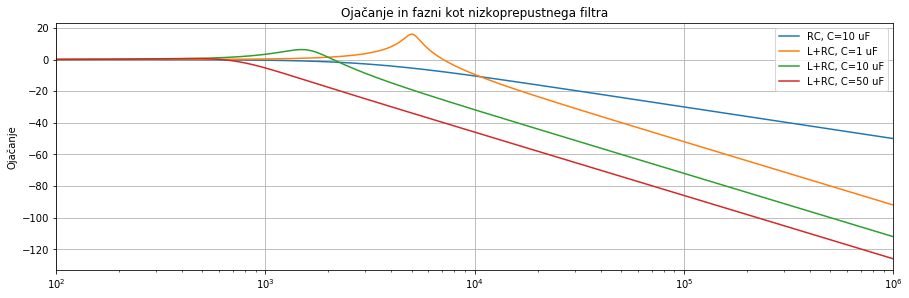

In [0]:
## l+RC filter
R=5
C=10e-6
L=1e-3
eksponent=np.linspace(2,6,500) # izdelamo 500 točk od 1 do 4, linearno
freq=10**(eksponent) # tvorimo niz frekvenc od 1e1 do 1e4
omega=2*np.pi*freq

def A(C):  # Ta funkcija vrne dve vrednosti A(C)[0 in A(C)[1]
    ZC=1/(1j*omega*C)
    ZL=1j*omega*L
    H=ZC/(R+ZC)
    H2=ZC/(ZC+ZL+R)
    A_dB=20*np.log10(np.abs(H))
    A2_dB=20*np.log10(np.abs(H2))
    return [A_dB,A2_dB]


plt.figure(figsize=(15, 10))
plt.subplot(211)
plt.semilogx(freq, A(1e-5)[0],label='RC, C=10 uF')
plt.semilogx(freq, A(1e-6)[1],label='L+RC, C=1 uF')
plt.semilogx(freq, A(1e-5)[1],label='L+RC, C=10 uF')
plt.semilogx(freq, A(5e-5)[1],label='L+RC, C=50 uF')
plt.ylabel('Ojačanje')
plt.title('Ojačanje in fazni kot nizkoprepustnega filtra')
plt.xlim(min(freq),max(freq))
plt.legend()
plt.grid()
plt.show()

**Ugotovitve:** Za primerjavo z L+RC vezjem smo izrisali tudi diagram za "navadni" RC filter. Ugotovimo, da ojačanje (slablenje) L+RC filtra pada hitreje kot navadnega RC filtra, sedaj s 40 dB/dekado. Bolj strma krivulja pomeni tudi učinkovitejšo filtracijo signalov. Vidimo pa, da v določeni kombinaciji RLC vezja pride tudi do povečanja ojačanja, kar je razložljivo, saj gre za RLC oscilatorno vezje v katerem je lahko napetost na posemeznemu elementu (v konkretnem primeru na kondezatorju) preseže vhodno napetost. Ni pa to pri filtrih ravno zaželeno, saj pomeni povečanje amplitude izhodnega signala pri določenih frekvencah. Ti prenihaji (po angleško ripple) so npr. značilni za filtre višjih redov, npr. za filter Chebisheva.

Red filtra hkrati predstavlja potrebno število kondenzatorjev in tuljav, ki jih potrebujemo za realizacijo filtra. Tak filter lahko realiziramo na več načinov, s kombinacijo uporov, kondenzatorjev (pasivnimi elementi) ali pa tudi z uporabo aktivnih elementov. Prednost uporabe pasivnih elementov je, da tak filter ne potrebuje dodatnega napajanja, je enostavno izvedljiv tudi za večje tokove, je enostaven za realizacijo, lahko dela do zelo visokih frekvenc, itd. Ne omogoča pa ojačitve signala, poleg tega je lahko njihova vhodna impedanca zelo majhna, izhodna zelo visoka, kar ni zaželeno v določenih aplikacijah. Poleg tega za realizacijo zahtevajo uporabo tuljav (dušilk), kar lahko poveča ceno (še posebno, če se zahteva veliko natančnost), potreben prostor je večji, niso dobavljivi v poljubnih vrednosti induktivnosti itd. Te pomanjkljivosti odpravijo aktivni filtri, realizirani z uporabo operacijskih ojačevalnikov. 


## Butterworthov filter 

Najbolj znani filtri višjih redov slišijo na ime Butterworthov, Chebishev, Besselov, Gaussov itd. Vsak ima svoje prednosti in pomanjkljivosti. Npr. za Butterworthov filter je značilna majhna valovitost signala v prepustnem pasu. 

Slablenje (atenuacija) Butterworthovega filtra podaja prenosna funkcija   $A=\sqrt{\frac{1}{1+{{\left( \frac{f}{{{f}_{o}}} \right)}^{2n}}}}$ , kjer je ${{f}_{o}}$ mejna frekvenca, n pa red Butterworthovega filtra. Ta red hkrati predstavlja potrebno število kondenzatorjev in tuljav, ki jih potrebujemo za realizacijo filtra. Tak filter lahko realiziramo na več načinov, s kombinacijo uporov, kondenzatorjev (pasivnimi elementi) ali pa tudi z uporabo aktivnih elementov. Prednost uporabe pasivnih elementov je, da tak filter ne potrebuje dodatnega napajanja, je enostavno izvedljiv tudi za večje tokove, je enostaven za realizacijo, lahko dela do zelo visokih frekvenc, itd. Ne omogoča pa ojačitve signala, poleg tega je lahko njihova vhodna impedanca zelo majhna, izhodna zelo visoka, kar ni zaželeno v določenih aplikacijah. Poleg tega za realizacijo zahtevajo uporabo tuljav (dušilk), kar lahko poveča ceno (še posebno, če se zahteva veliko natančnost), potreben prostor je večji, niso dobavljivi v poljubnih vrednosti induktivnosti itd. Te pomanjkljivosti odpravijo aktivni filtri, realizirani z uporabo operacijskih ojačevalnikov. 

Načrtovanje teh filtrov zahteva bolj poglobljeno obravnavo, ki pa v tem zvezku ni predvidena. Lahko pa uporabimo preprosto izdelana orodja, s pomočjo katerih lahko hitro določimo potrebne komponente vezja za realizacijo ustreznega filtra. 

Izdelajmo npr. nizkoprepustni Butterworthov filter četrtega reda z mejno frekvenco 1 MHz za 50 $\Omega$ bremensko upornost, prilagojeno na enako generatorsko notranjo upornost. Izračun na spletni strani https://rf-tools.com/lc-filter/ nam izračuna vezje na sliki.

 <img src="https://raw.githubusercontent.com/osnove/Slike/master/Butter_filter.PNG" style="height:200px">

Preverimo, kako na ta filter vpliva sprememba bremenske in notranje upornosti vira. Več npr. na strani http://www.ti.com/lit/an/slyt681/slyt681.pdf ali https://www.wikiwand.com/en/Butterworth_filter.

Prenosno funkcijo najlažje zapišemo kot produkt dveh napetostnih delilnikov. Najprej tvorimo prenosno funkcijo, ki vključuje tuljavo L1 in kondenzator C2
$\frac{\underline U_{C2}}{\underline U}=\frac{1/(j\omega C2)}{R+j\omega L1+1/(j\omega C2)}$
in nato L3 in C4  
$\frac{\underline U_{C4}}{\underline U_{C2}}=\frac{1/(j\omega C4 +RL)}{j\omega L2+1/(j\omega C4 +RL)}.$

Z množenjem obeh prenosnih funkcij dobimo 
$H(j\omega)=\frac{\underline U_{C2}}{\underline U} \frac{\underline U_{C4}}{\underline U_{C2}}=\frac{\underline U_{C4}}{\underline U}$.

To je narejeno v spodnji celici, kjer je H=H1*H2.


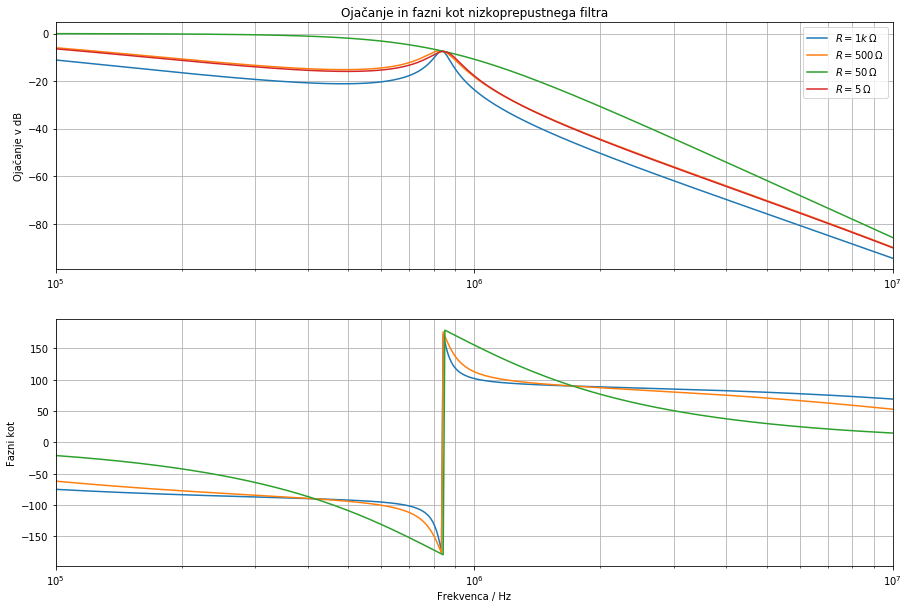

In [0]:
## Butterworthov filter za mejno frekvenco 1 MHz in breme 50 ohmov
L1=6.2e-6
C2=5.6e-9
L3=15e-6
C4=2.4e-9

eksponent=np.linspace(5,7,500) # izdelamo 500 točk od 1 do 4, linearno
freq=10**(eksponent) # tvorimo niz frekvenc od 1e1 do 1e4
omega=2*np.pi*freq

# prenosna funkcija v odvisnosti od bremenske upornosti
def H(R): 
    ZL1=1j*omega*L1+R
    ZC2=1/(1j*omega*C2)
    ZL3=1j*omega*L3
    ZC4=1/(1j*omega*C4+1/R)

    H1=ZC2/(ZL1+ZC2)
    H2=ZC4/(ZL3+ZC4)
    return H1*H2

# ojačanje v dB
def A_dB(R):
    return 20*np.log10(np.abs(H(R)))



plt.figure(figsize=(15, 10))
plt.subplot(211)
plt.semilogx(freq, A_dB(1000),label='$R=1k\,\Omega$')
plt.semilogx(freq, A_dB(500),label='$R=500\,\Omega$')
plt.semilogx(freq, A_dB(50),label='$R=50\,\Omega$')
plt.semilogx(freq, A_dB(5),label='$R=5\,\Omega$')
plt.ylabel('Ojačanje v dB')
plt.title('Ojačanje in fazni kot nizkoprepustnega filtra')
plt.xlim(min(freq),max(freq))
plt.grid(True,which="both",ls="-")
plt.legend()

plt.subplot(212)
plt.semilogx(freq,np.angle(H(1000))*180/np.pi)
plt.semilogx(freq,np.angle(H(500))*180/np.pi)
plt.semilogx(freq,np.angle(H(50))*180/np.pi)
plt.ylabel('Fazni kot')
plt.xlabel('Frekvenca / Hz')
plt.xlim(min(freq),max(freq))
plt.grid(True,which="both",ls="-")
plt.show()

V spodnji celici združimo spoznanja filtriranja in prikažimo učinkovitost zgornjega Butterworthovega filtra pri filtriranju signala več frekvenc.

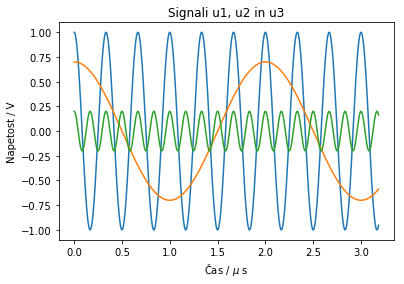

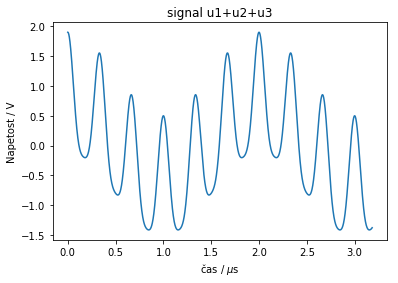

Slablenje v dB:  -44.2715142111 -1.96538164854 -68.1124394438


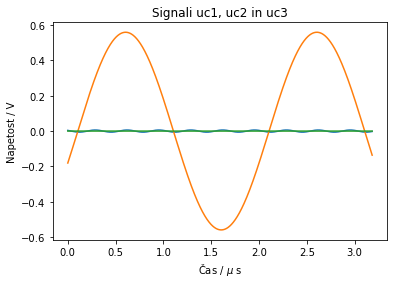

In [0]:
## Izdelava in prikaz testnega signala in filtriranja z BW filtrom 4 reda
# Nastavitev parametrov
omega1=2*np.pi*3e6 # 
omega2=2*np.pi*1e5 # koristni signal
omega3=2*np.pi*6e6 #
U1=1 # amplituda signala u1(t)
U2=0.7
U3=0.2

# časovni niz
t=np.linspace(0,10/omega2,2000) 

# napetostni signali
u1=U1*np.cos(omega1*t)
u2=U2*np.cos(omega2*t)
u3=U3*np.cos(omega3*t)
u=u1+u2+u3
# izris posameznih signalov
plt.figure()
plt.title('Signali u1, u2 in u3')
plt.xlabel('Čas / $\mu$ s')
plt.ylabel('Napetost / V')
plt.plot(t*1e6,u1,t*1e6,u2,t*1e6,u3)
plt.plot([0, max(t)],[0, 0], linestyle=':',color='k') # dodamo ničlo
# izris vsote signalov
plt.figure()
plt.title('signal u1+u2+u3')
plt.xlabel('čas / $\mu$s')
plt.ylabel('Napetost / V')
plt.plot(t*1e6,u,label='u(t)')
plt.plot([0, max(t)],[0, 0], linestyle=':',color='k') # dodamo ničlo
plt.show()

# izdelava BW filtra 4 reda
L1=6.2e-6
C2=5.6e-9
L3=15e-6
C4=2.4e-9
R=50

# prenosna funkcija v odvisnosti od bremenske upornosti
def H(omega): 
    ZL1=1j*omega*L1+R
    ZC2=1/(1j*omega*C2)
    ZL3=1j*omega*L3
    ZC4=1/(1j*omega*C4+1/R)
    H1=ZC2/(ZL1+ZC2)
    H2=ZC4/(ZL3+ZC4)
    return H1*H2

# Izdelamo kompleksorje izhodnih signalov in nato časovni signal
UC1=U1*H(omega1); # kompleksor UC1
uc1=abs(UC1)*np.cos(omega1*t+np.angle(UC1))
UC2=U2*H(omega2); 
uc2=abs(UC2)*np.cos(omega2*t+np.angle(UC2))
UC3=U3*H(omega3)
uc3=abs(UC3)*np.cos(omega3*t+np.angle(UC3))
print('Slablenje v dB: ',20*np.log10(abs(UC1)/U1),20*np.log10(abs(UC2)/U2),20*np.log10(abs(UC3)/U3))

# izris filtriranih signalov
plt.figure()
plt.title('Signali uc1, uc2 in uc3')
plt.xlabel('Čas / $\mu$ s')
plt.ylabel('Napetost / V')
plt.plot(t*1e6,uc1,t*1e6,uc2,t*1e6,uc3)
plt.plot([0, max(t)],[0, 0], linestyle=':',color='k') # dodamo ničlo

**Ugotovitve:** Butterworthov filter zelo učinkovito filtrira signale s frekvenco višjo od mejne frekvence 1 MHz. Amplituda koristnega signala 0.1 MHz je zmanjšana za manj kot 1% (-0.04 dB), amplituda signala 3 MHz za -44 dB in signala 6 MHz -68 dB. Iz primerjave slik tudi vidimo, da je filtriran signal fazno zamaknjen glede na prvotnega. Še bistveno večji fazni zamik bi imel signal s frekvenco bližje mejni, npr. 0.5 MHz. Preiskusi sam!

### Zdaj pa ti

Na spletni strani https://rf-tools.com/lc-filter/ lahko izdelaš še druge tipe filtrov, npr. Besselovega ali Chebisheva. V bistvu z isto konfiguracijo elementov, le drugimi vrednostmi. Izvedi primerjavo prenosnih funkcij teh filtrov. 

## Dodatno - filtriranje digitalnih signalov

Velja vsaj omeniti, da pogosto filtre uporabljamo za filtriranje signalov v digitalni obliki, torej ne znotraj vezja pač pa že zajete in digitalizirane signale. V tem primeru seveda ni potrebna fizična realizacija filtra v obliki vezja pač pa se filtriranje izvede z računalniško kodo, ki vsebuje določeno obliko filtra. Ta seveda ne potrebuje biti tako preprost kot enostaven RC filter, saj je običajno izveden v obliki prenosne funkcije, ki je sestavljena iz polinomov višjega reda. Med drugim se v digitalni obdelavi uporablja tudi digitalno verzijo Butterworthovega filtra (ali drugih). Python omogoča uporabo digitalnih filtrov v modulu SciPy.

V spodnji celici je primer uporabe digitalnega pasovnega Butterworthovega filtra 6 reda s spodnji mejno frekvenco 500 Hz in zgornjo mejno frekvenco 1250 Hz.  Poleg Bodejevega diagrama filtra je prikazan primer filtriranja zašumljenega signala. Primer je povzet po https://scipy-cookbook.readthedocs.io/items/ButterworthBandpass.html. 
(Tudi digitalni Butterworthov filter fazno zamakne filtriran signal, kar pa se da popraviti. Zamislimo si lahko, da časovni signal obrnemo in ponovno filtriramo. Sedaj bo filtriran signal tudi fazno zamaknjen, vendar v primerjavi z originalnim ravno v drugo smer. Ta trik uporabi funkcija <a href="https://scipy-cookbook.readthedocs.io/items/FiltFilt.html"> $filtfilt$</a> , ki poskrbi za filtriranje brez faznega zamika fitriranega signala.)

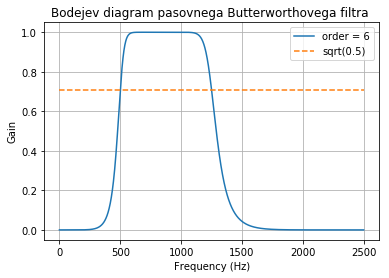

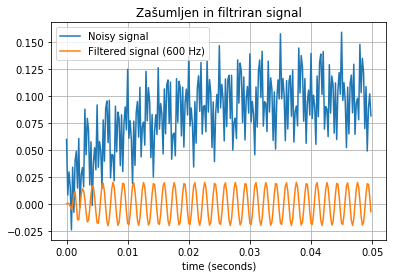

In [0]:
## Primer uporabe digitalnega Butterworthovega filtra
from scipy.signal import freqz
from scipy.signal import butter, lfilter

# Funkcija izračuna parametra a in b prenosne funkcije
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs # Nyquistova frekvenca je polovica semplirne
    low = lowcut / nyq # normiranje z Nyquistovo frekvenco
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band') # vrže ven parametre filtra
    return b, a

# funkcija izdela filter ter ga aplicira na signalu 'data' in vrne 
# filtriran signal v spremenljivki y 
def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

fs = 5000.0  # semplirna frekvenca (frekvenca vzorčenja signala)
lowcut = 500.0 # spodnja mejna frkvenca
highcut = 1250.0
order=6  # red filtra

# Plot the frequency response for a few different orders.
plt.figure(1)
plt.title('Bodejev diagram pasovnega Butterworthovega filtra ')
b, a = butter_bandpass(lowcut, highcut, fs, order=order) # določi parametre BW filtra
w, h = freqz(b, a, worN=2000) # izvede prenosno funkcijo h s parametri BW filtra, w so normirane frekvence
plt.plot((fs * 0.5 / np.pi) * w, abs(h), label="order = %d" % order) # izris prenosne funkcije filtra
plt.plot([0, 0.5 * fs], [np.sqrt(0.5), np.sqrt(0.5)],'--', label='sqrt(0.5)') # mejna frekvenca
plt.xlabel('Frequency (Hz)')
plt.ylabel('Gain')
plt.grid(True)
plt.legend(loc='best')

# Filtriranje zašumljenega signala
T = 0.05 # končni čas sempliranja (vzorčenja)
nsamples = T * fs # število vzorcev
t = np.linspace(0, T, int(nsamples), endpoint=False)
a = 0.02 # amplituda koristnega signala
f0 = 600.0 # frekvenca signala, ki ga iščemo - izfiltriramo
# kreiranje testnega signala kot vsota sinusov različnih frekvenc in amplitud
x = 0.1 * np.sin(2 * np.pi * 1.2 * np.sqrt(t))
x += 0.01 * np.cos(2 * np.pi * 312 * t + 0.1)
x += a * np.cos(2 * np.pi * f0 * t + .11)
x += 0.03 * np.cos(2 * np.pi * 2000 * t)

plt.figure(2)
plt.title('Zašumljen in filtriran signal')
plt.plot(t, x, label='Noisy signal') # izris signala s šumom
y = butter_bandpass_filter(x, lowcut, highcut, fs, order=6) # filtriran signal
plt.plot(t, y, label='Filtered signal (%g Hz)' % f0)
plt.xlabel('time (seconds)')
#plt.hlines([-a, a], 0, T, linestyles='--') 
plt.grid(True)
plt.axis('tight')
plt.legend(loc='upper left')
plt.show()

**Ugotovitve:** Digitalni Butterworthov filter učinkovito zajame signale znotraj pasovnega filtra. To lahko ugotavljamo tako, da spreminjamo testni signal in tudi frekvenco koristnega signala znotraj "šuma", ki ga določa parameter $f0$.

## Rešitve

In [0]:
## Za doris mejne frkvence horizontalno in vertikalno dodaj med plt ukaze
plt.semilogx([freq_0,freq_0],[0,1],'k:')
plt.semilogx([min(freq),max(freq)],[1/np.sqrt(2),1/np.sqrt(2)],'k:')

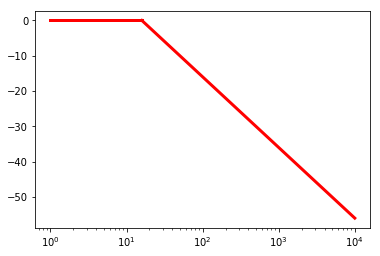

In [0]:
# Za doris premic v Bodejev diagram - dodaj med plt ukaze
plt.semilogx([min(freq),freq_0],[0,0],color='r',linewidth=3)
plt.semilogx([freq_0,max(freq)],[0,min(A_dB)],color='r',linewidth=3)

In [0]:
# Izračun A_dB iz A
A=[1,0.5,0.1,0.01,0.001]
for x in range(len(A)): # kličem vsako vrednost v nizu A izračunam in sprintam
    print(A[x],20*np.log10(A[x]))
    
# Drugi način
A_dB=20*np.log10(A)
b=np.transpose([A,A_dB]) # naredim skupni niz in ga transponiram v stolpce
np.set_printoptions(suppress=True) # za izpis brez eksponentov
print(b)

# Zagotovo obstaja še tretji itd način 

1 0.0
0.5 -6.020599913279624
0.1 -20.0
0.01 -40.0
0.001 -60.0
[[  1.      0.   ]
 [  0.5    -6.021]
 [  0.1   -20.   ]
 [  0.01  -40.   ]
 [  0.001 -60.   ]]


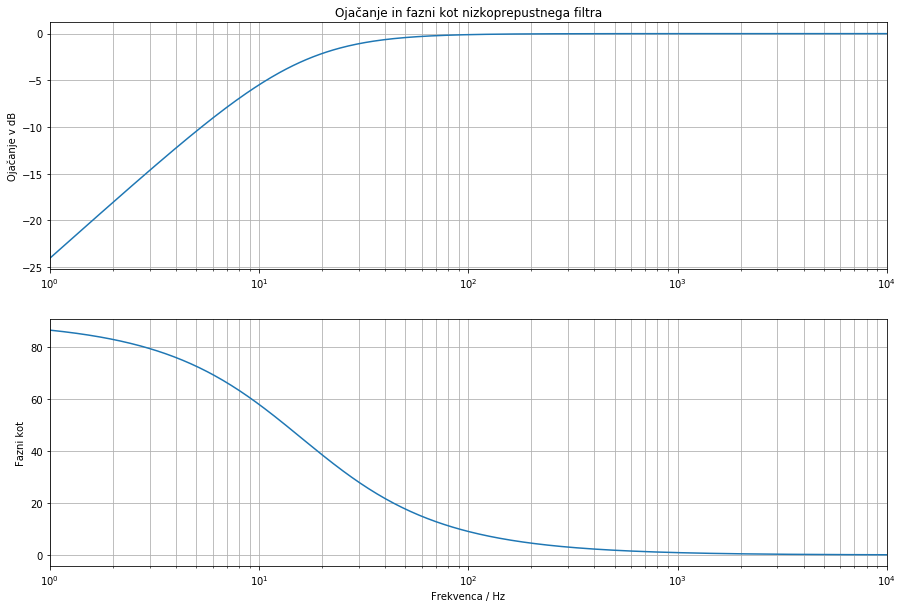

In [0]:
## Visokoprepustni RC filter
R=1e3
C=10e-6
eksponent=np.linspace(0,4,500) # izdelamo 500 točk od 1 do 4, linearno
freq=10**(eksponent) # tvorimo niz frekvenc od 1e1 do 1e4
omega=2*np.pi*freq

ZC=1/(1j*omega*C)
H=R/(R+ZC)

A_dB=20*np.log10(np.abs(H))

plt.figure(figsize=(15, 10))
plt.subplot(211)
plt.semilogx(freq, A_dB)
plt.ylabel('Ojačanje v dB')
plt.title('Ojačanje in fazni kot nizkoprepustnega filtra')
plt.xlim(min(freq),max(freq))
plt.grid(True,which="both",ls="-")

plt.subplot(212)
plt.semilogx(freq,np.angle(H)*180/np.pi)
plt.ylabel('Fazni kot')
plt.xlabel('Frekvenca / Hz')
plt.xlim(min(freq),max(freq))
plt.grid(True,which="both",ls="-")
plt.show()

## Zaključek

V tem zvezku smo si ogledali nekaj primerov filtrov. Pri tem smo ugotovili, da lastnosti filtra prikažemo s prenosno funkcijo, ki je razmerje med vhodnim in izhodnim kompleksorjem napetosti. Običajno to ojačanje (slabljenje) ponazorimo v decibelih kot $20\log(A)$ in grafično ponazorimo kot funkcijo frekvence, kar imenujemo Bodejev diagram. Mejno frekvenco filtra določimo tam, kjer ojačanje (izhodna/vhodna napetost) pade za $\sqrt 2$ oziroma za -3 dB.

Prikazali smo preprost primer nizkoprepustnega RC filtra, ki ga imenujemo filter prvega reda, ker se ojačanje v prepustnem področju zmanjšuje za -20 dB/dekado. Če takemu filtru dodamo tuljavo, dobimo filter drugega reda, kateremu se ojačanje zmanjšuje -40 dB/dekado. 


Višji redi filtrov so znani pod imeni Butterworthov, filter Chebischeva, Besselov, Gaussov, eliptični itd. Vsak ima svoje prednosti in pomanjkljivosti. Prikazali smo nizkoprepustni Butterworthov filter 4 reda.


V zvezku smo obravnavali le t.i. pasivne filtre, torej take, ki ne vključujejo polprevodniških komponent, predvsem operacijskih ojačevalnikov. Pogosto, še posebno pri manjših močeh (tokovih) uporabljamo ravno slednje.

Na koncu smo pokazali še možnost uporabe digitalnih filtrov, ki omogočajo filtriranje digitalno zajetih signalov. V ta namen se lahko uporabi tudi Butterworthov filter ali druge, ki temeljijo na uporabi digitalizirane prenosne funkcije.

**Naslednje branje:** 